# Creating curves

These functions all output:
1. x_fun: a function that takes a parameter t and returns the x-coordinate of the curve at that point
2. y_fun: a function that takes a parameter t and returns the y-coordinate of the curve at that point
3. time: the time it takes to complete the curve


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotUtils import *

### Circle:

Start at the current position (0, 0) and move in a circle of `radius_m` for `flight_time` seconds.

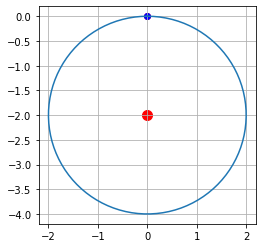

(<function __main__.circle.<locals>.<lambda>(t)>,
 <function __main__.circle.<locals>.<lambda>(t)>)

In [2]:
# Circle that change velocities in two directions:
def circle_facing_constant(r, flight_time, angle_degrees=360.0):
    if flight_time <= 0:
        raise ValueError("flight_time must be positive")
    if r <= 0:
        raise ValueError("radius must be positive")

    angle_radians = angle_degrees / 360.0 * 2 * np.pi
    # # positive x_axis, clockwise
    # x_fun = lambda t:  - r * np.cos(t / flight_time  * angle_radians) + r
    # y_fun = lambda t: r * np.sin(t / flight_time * angle_radians)
    # center = (r, 0)

    # # negative x_axis, counter-clockwise
    # x_fun = lambda t: r * np.cos(t / flight_time  * angle_radians) - r
    # y_fun = lambda t: r * np.sin(t / flight_time * angle_radians)
    # center = (-r, 0)

    # # negative x_axis, clockwise
    # x_fun = lambda t: r * np.cos(t / flight_time  * angle_radians) - r
    # y_fun = lambda t:  - r * np.sin(t / flight_time * angle_radians)
    # center = (-r, 0)

    # # negative x_axis, counter-clockwise
    # x_fun = lambda t: - r * np.cos(t / flight_time  * angle_radians) + r
    # y_fun = lambda t:  - r * np.sin(t / flight_time * angle_radians)
    # center = (r, 0)

    # # positive y_axis, clockwise
    # x_fun = lambda t: - r * np.sin(t / flight_time * angle_radians)
    # y_fun = lambda t:  - r * np.cos(t / flight_time  * angle_radians) + r
    # center = (0, r)

    # # positive y_axis, counter-clockwise
    # x_fun = lambda t: r * np.sin(t / flight_time * angle_radians)
    # y_fun = lambda t:  - r * np.cos(t / flight_time  * angle_radians) + r
    # center = (0, r)

    # # negative y_axis, counter-clockwise
    # x_fun = lambda t: - r * np.sin(t / flight_time * angle_radians)
    # y_fun = lambda t:  r * np.cos(t / flight_time  * angle_radians) - r
    # center = (0, -r)

    # negative y_axis, clockwise
    x_fun = lambda t: r * np.sin(t / flight_time * angle_radians)
    y_fun = lambda t:  r * np.cos(t / flight_time  * angle_radians) - r
    center = (0, -r)

    # Display the curve:
    plt.scatter(center[0], center[1], c='r', s=100)
    plot_curve(x_fun, y_fun, flight_time)

    distance = r * angle_radians
    velocity = distance / flight_time

    return x_fun, y_fun

circle(r=2, flight_time=50, angle_degrees=360)

### Sinusoid:

Start at the current position (0, 0) and move in an amplitude of `amplitude_m` for `flight_time` seconds and creates `c` cycles.

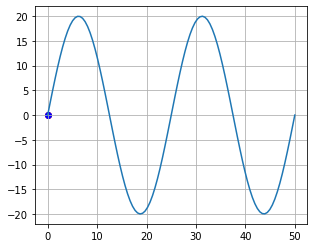

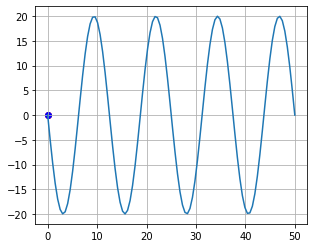

In [3]:
# Drone will start in position (0,0) and end up in position(distance, 0)
# Amplitude can be negative, indicating reverse direction
# Distance can be negative, indicating reverse direction
# Cycles can be a fraction (preferably a multiple of 0.5), indicating a partial cycle
def sine(amplitude, flight_time, distance, cycles=1):
    if (cycles <= 0):
        raise ValueError("cycles must be positive")
    if (flight_time <= 0):
        raise ValueError("flight_time must be positive")

    frequency = 1 / distance * cycles
    angular_frequency = 2 * np.pi * frequency

    x_fun = lambda t: t / flight_time * distance
    y_fun = lambda t: amplitude * np.sin(t / flight_time * angular_frequency * distance)
    plot_curve(x_fun, y_fun, flight_time)

sine(amplitude=20, flight_time=100, distance=50, cycles=2)
sine(amplitude=-20, flight_time=100, distance=50, cycles=4)

### Rose:

Start and end at position (0, 0) and move in a rose.


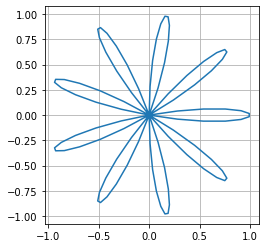

(<function __main__.rose.<locals>.<lambda>(t)>,
 <function __main__.rose.<locals>.<lambda>(t)>)

In [4]:
# a defines the radius of the rose.
# k defines the number of petals, the curve has 2k petals if k is even, and k petals if k is odd.
def rose(a, k, flight_time):
    # delta_t is a time adjustment parameter. Without this, the function will start at (1, 0). We want it to start at (0, 0).
    delta_t = flight_time / (4 * k)
    if k % 2 == 0:
        x_fun = lambda t: a * np.cos(k * 2 * np.pi * (t - delta_t) / flight_time) * np.cos(2 * np.pi * (t - delta_t) / flight_time)
        y_fun = lambda t: a * np.cos(k * 2 * np.pi * (t - delta_t) / flight_time) * np.sin(2 * np.pi * (t - delta_t) / flight_time)
    else:
        x_fun = lambda t: a * np.cos(k * 2 * np.pi * (t / 2 - delta_t) / flight_time) * np.cos(2 * np.pi * (t / 2- delta_t) / flight_time)
        y_fun = lambda t: a * np.cos(k * 2 * np.pi * (t / 2 - delta_t) / flight_time) * np.sin(2 * np.pi * (t / 2 - delta_t) / flight_time)

    plot_curve(x_fun, y_fun, flight_time)
    return x_fun, y_fun

rose(a=1, k=9, flight_time=10)


### Spiral

Produces the trajectory of an archimedean spiral

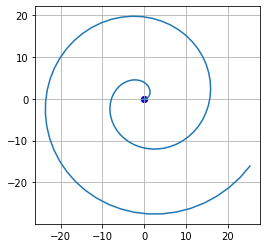

(<function __main__.spiral.<locals>.<lambda>(t)>,
 <function __main__.spiral.<locals>.<lambda>(t)>)

In [5]:
# In polar coordinates, spirals are represented as r = a + b * theta
# r_max denotes the maximum distance, i.e. the drone will end up at (r_max * cos(r_max/b), r_max * sin(r_max/b))
def spiral(b, r_max, flight_time):
    x_fun = lambda t: r_max * t / flight_time * np.cos(r_max * t / flight_time / b)
    y_fun = lambda t: r_max * t / flight_time * np.sin(r_max * t / flight_time / b)

    plot_curve(x_fun, y_fun, flight_time)
    return x_fun, y_fun

spiral(b=2.5, r_max=30, flight_time=10)


### Helix

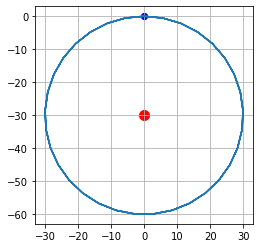

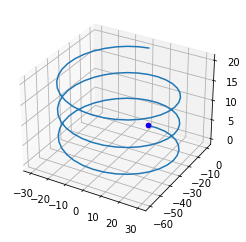

(<function __main__.circle.<locals>.<lambda>(t)>,
 <function __main__.circle.<locals>.<lambda>(t)>,
 <function __main__.helix.<locals>.<lambda>(t)>)

In [30]:
def helix(r, flight_time, speed_z, angle_degrees=360):
    x_fun, y_fun = circle(r, flight_time, angle_degrees=angle_degrees)
    z_fun = lambda t: speed_z * t

    plot_curve_3d(x_fun, y_fun, z_fun, flight_time)
    return x_fun, y_fun, z_fun

helix(30, 20, 1, 1080)

### Exponential:

